                            White     Mixed     Asian     Black    Other
Borough                                                                 
Bexley                    13746.0    1536.0    1801.0    4387.0    389.0
England                 2918677.0  205913.0  426632.0  228319.0  56437.0
Hackney                    5314.0    1526.0    1910.0    5760.0    485.0
Haringey                   7744.0    1945.0    1038.0    4281.0    773.0
Islington                  3764.0    1358.0    1194.0    2933.0    291.0
Kensington and Chelsea     2299.0     961.0     242.0    1159.0    442.0
Kingston upon Thames       6316.0    1141.0    2841.0     523.0    468.0
Lambeth                    4090.0    1878.0     735.0    7275.0    586.0
Lewisham                   4608.0    2121.0     926.0    6764.0    489.0
London                   223141.0   55812.0  122815.0  123187.0  18528.0
Sutton                    10733.0    1899.0    5078.0    1908.0    464.0
Westminster                2966.0    1162.0    1538

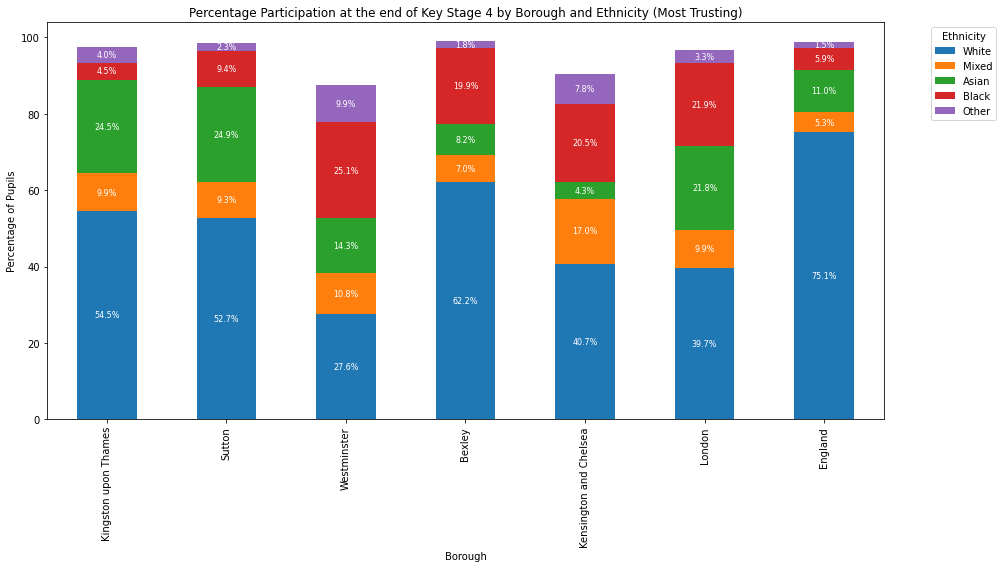

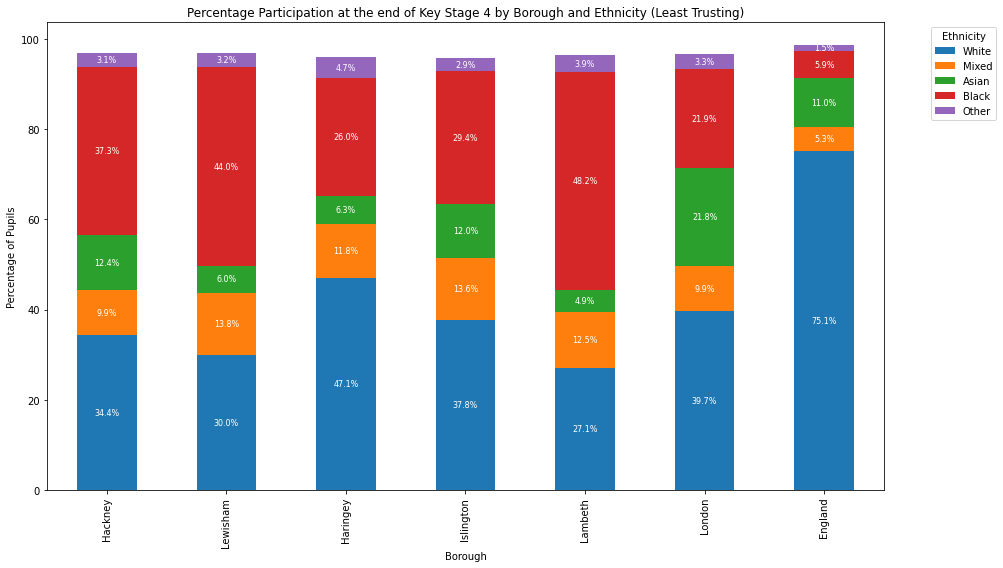

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# List of file paths for all 8 CSV files
file_paths = [
r"C:\Users\lowik\OneDrive - TU Eindhoven\Uni mapsh\2023-2024\Data Challenge 2\JBG050-Group14\Education\GCSE results 2022-23.csv",
r"C:\Users\lowik\OneDrive - TU Eindhoven\Uni mapsh\2023-2024\Data Challenge 2\JBG050-Group14\Education\GCSE results 2021-22.csv",
r"C:\Users\lowik\OneDrive - TU Eindhoven\Uni mapsh\2023-2024\Data Challenge 2\JBG050-Group14\Education\GCSE results 2020-21.csv",
r"C:\Users\lowik\OneDrive - TU Eindhoven\Uni mapsh\2023-2024\Data Challenge 2\JBG050-Group14\Education\GCSE results 2019-20.csv",
r"C:\Users\lowik\OneDrive - TU Eindhoven\Uni mapsh\2023-2024\Data Challenge 2\JBG050-Group14\Education\GCSE results 2018-19.csv",
r"C:\Users\lowik\OneDrive - TU Eindhoven\Uni mapsh\2023-2024\Data Challenge 2\JBG050-Group14\Education\GCSE results 2017-18.csv",
r"C:\Users\lowik\OneDrive - TU Eindhoven\Uni mapsh\2023-2024\Data Challenge 2\JBG050-Group14\Education\GCSE results 2016-17.csv",
r"C:\Users\lowik\OneDrive - TU Eindhoven\Uni mapsh\2023-2024\Data Challenge 2\JBG050-Group14\Education\GCSE results 2015-16.csv"
]


# Initialize an empty DataFrame to store all data
all_data = pd.DataFrame()

# Load and concatenate data from all files
for file in file_paths:
    df = pd.read_csv(file)
    all_data = pd.concat([all_data, df])

# Ensure consistent column names
all_data.rename(columns={'Unnamed: 0': 'Borough'}, inplace=True)

# Convert count columns to numeric
for col in ['White', 'Mixed', 'Asian', 'Black', 'Other', 'All Pupils']:
    all_data[col] = all_data[col].replace(',', '', regex=True).astype(float)

# Sum the total counts of each ethnicity and the total number of pupils over all the years for each borough
total_counts = all_data.groupby('Borough')[['White', 'Mixed', 'Asian', 'Black', 'Other', 'All Pupils']].sum()


# Calculate the percentages based on these sums
ethnicity_columns = ['White', 'Mixed', 'Asian', 'Black', 'Other']
total_counts_pct = total_counts[ethnicity_columns].div(total_counts['All Pupils'], axis=0) * 100

print(total_counts[ethnicity_columns])
print(total_counts['All Pupils'])
# Define the boroughs for the two groups including London and England
most_trusting_boroughs = ['Kingston upon Thames', 'Sutton', 'Westminster', 'Bexley', 'Kensington and Chelsea', 'London', 'England']
least_trusting_boroughs = ['Hackney', 'Lewisham', 'Haringey', 'Islington', 'Lambeth', 'London', 'England']

# Split the data into two groups
most_trusting_data_pct = total_counts_pct.loc[most_trusting_boroughs]
least_trusting_data_pct = total_counts_pct.loc[least_trusting_boroughs]

# Function to add annotations
def add_annotations(ax, df):
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        if height > 0:
            ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=8, color='white')

# Plotting the most trusting boroughs
fig, ax = plt.subplots(figsize=(14, 8))
most_trusting_data_pct.plot(kind='bar', stacked=True, ax=ax)
add_annotations(ax, most_trusting_data_pct)
plt.title('Percentage Participation at the end of Key Stage 4 by Borough and Ethnicity (Most Trusting)')
plt.xlabel('Borough')
plt.ylabel('Percentage of Pupils')
plt.legend(title='Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plotting the least trusting boroughs
fig, ax = plt.subplots(figsize=(14, 8))
least_trusting_data_pct.plot(kind='bar', stacked=True, ax=ax)
add_annotations(ax, least_trusting_data_pct)
plt.title('Percentage Participation at the end of Key Stage 4 by Borough and Ethnicity (Least Trusting)')
plt.xlabel('Borough')
plt.ylabel('Percentage of Pupils')
plt.legend(title='Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [3]:

print(total_counts[ethnicity_columns])
print(total_counts['All Pupils'])


                            White     Mixed     Asian     Black    Other
Borough                                                                 
Bexley                    13746.0    1536.0    1801.0    4387.0    389.0
England                 2918677.0  205913.0  426632.0  228319.0  56437.0
Hackney                    5314.0    1526.0    1910.0    5760.0    485.0
Haringey                   7744.0    1945.0    1038.0    4281.0    773.0
Islington                  3764.0    1358.0    1194.0    2933.0    291.0
Kensington and Chelsea     2299.0     961.0     242.0    1159.0    442.0
Kingston upon Thames       6316.0    1141.0    2841.0     523.0    468.0
Lambeth                    4090.0    1878.0     735.0    7275.0    586.0
Lewisham                   4608.0    2121.0     926.0    6764.0    489.0
London                   223141.0   55812.0  122815.0  123187.0  18528.0
Sutton                    10733.0    1899.0    5078.0    1908.0    464.0
Westminster                2966.0    1162.0    1538

In [4]:
# Calculate the total counts for each borough by summing the five ethnicities
total_ethnicity_counts = total_counts[['White', 'Mixed', 'Asian', 'Black', 'Other']].sum(axis=1)

# Convert the Series to a dictionary, list, or DataFrame
total_ethnicity_counts_dict = total_ethnicity_counts.to_dict()  # Dictionary
total_ethnicity_counts_list = total_ethnicity_counts.tolist()  # List
total_ethnicity_counts_df = total_ethnicity_counts.reset_index().rename(columns={0: 'Total Ethnicity Count'})  # DataFrame

# # Display the results
# print("Dictionary:")
# print(total_ethnicity_counts_dict)

# print("\nList:")
# print(total_ethnicity_counts_list)

print("\nDataFrame:")
print(total_ethnicity_counts_df['Total Ethnicity Count'][0])
total_ethnicity_counts_df['Total Ethnicity Count'][0:12]


DataFrame:
21859.0


0       21859.0
1     3835978.0
2       14995.0
3       15781.0
4        9540.0
5        5103.0
6       11289.0
7       14564.0
8       14908.0
9      543483.0
10      20082.0
11       9429.0
Name: Total Ethnicity Count, dtype: float64

In [5]:
total_counts

,White,Mixed,Asian,Black,Other,All Pupils
Borough,,,,,,
Bexley,13746.0,1536.0,1801.0,4387.0,389.0,22083.0
England,2918677.0,205913.0,426632.0,228319.0,56437.0,3884215.0
Hackney,5314.0,1526.0,1910.0,5760.0,485.0,15461.0
Haringey,7744.0,1945.0,1038.0,4281.0,773.0,16445.0
Islington,3764.0,1358.0,1194.0,2933.0,291.0,9964.0
Kensington and Chelsea,2299.0,961.0,242.0,1159.0,442.0,5642.0
Kingston upon Thames,6316.0,1141.0,2841.0,523.0,468.0,11583.0
Lambeth,4090.0,1878.0,735.0,7275.0,586.0,15084.0
Lewisham,4608.0,2121.0,926.0,6764.0,489.0,15382.0


In [6]:
for i in range(len(total_counts[['All Pupils']]-1)):
    total_counts['All Pupils'][i] = total_ethnicity_counts_df['Total Ethnicity Count'][i]
    
print(total_counts['All Pupils'])
total_counts

Borough
Bexley                      21859.0
England                   3835978.0
Hackney                     14995.0
Haringey                    15781.0
Islington                    9540.0
Kensington and Chelsea       5103.0
Kingston upon Thames        11289.0
Lambeth                     14564.0
Lewisham                    14908.0
London                     543483.0
Sutton                      20082.0
Westminster                  9429.0
Name: All Pupils, dtype: float64


,White,Mixed,Asian,Black,Other,All Pupils
Borough,,,,,,
Bexley,13746.0,1536.0,1801.0,4387.0,389.0,21859.0
England,2918677.0,205913.0,426632.0,228319.0,56437.0,3835978.0
Hackney,5314.0,1526.0,1910.0,5760.0,485.0,14995.0
Haringey,7744.0,1945.0,1038.0,4281.0,773.0,15781.0
Islington,3764.0,1358.0,1194.0,2933.0,291.0,9540.0
Kensington and Chelsea,2299.0,961.0,242.0,1159.0,442.0,5103.0
Kingston upon Thames,6316.0,1141.0,2841.0,523.0,468.0,11289.0
Lambeth,4090.0,1878.0,735.0,7275.0,586.0,14564.0
Lewisham,4608.0,2121.0,926.0,6764.0,489.0,14908.0


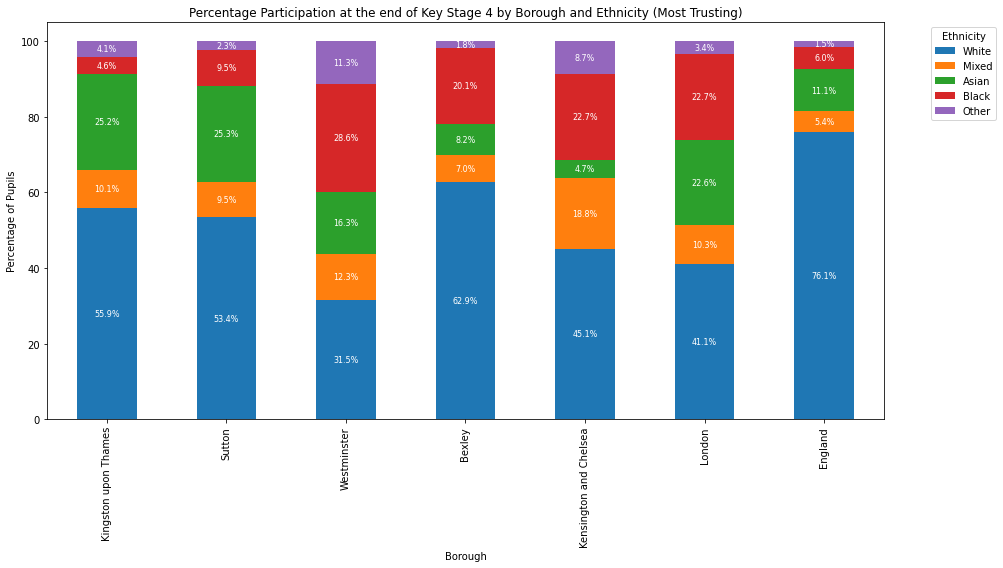

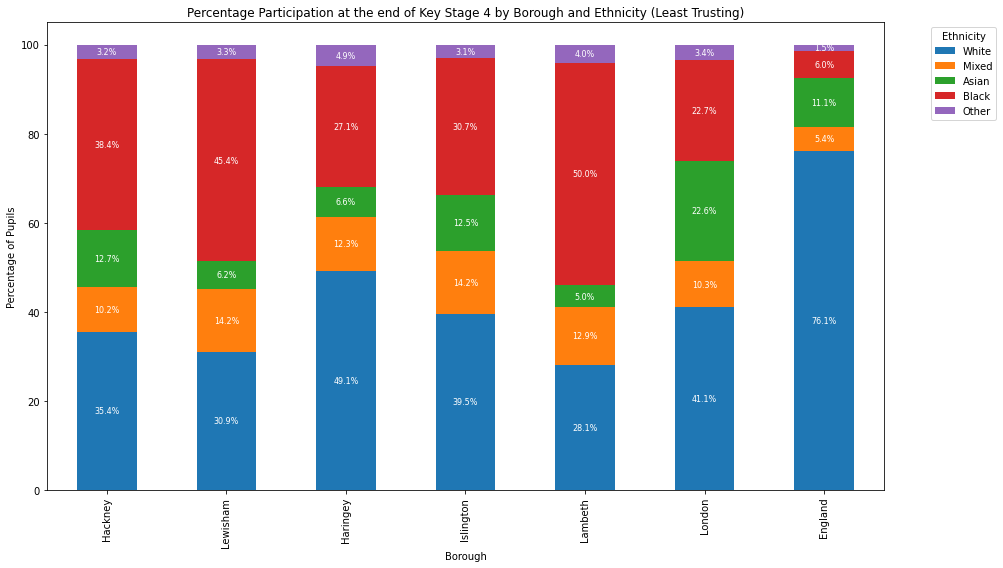

In [58]:
# Calculate the percentages based on these sums
ethnicity_columns = ['White', 'Mixed', 'Asian', 'Black', 'Other']
total_counts_pct = total_counts[ethnicity_columns].div(total_counts['All Pupils'], axis=0) * 100
# Define the boroughs for the two groups including London and England
most_trusting_boroughs = ['Kingston upon Thames', 'Sutton', 'Westminster', 'Bexley', 'Kensington and Chelsea', 'London', 'England']
least_trusting_boroughs = ['Hackney', 'Lewisham', 'Haringey', 'Islington', 'Lambeth', 'London', 'England']

# Split the data into two groups
most_trusting_data_pct = total_counts_pct.loc[most_trusting_boroughs]
least_trusting_data_pct = total_counts_pct.loc[least_trusting_boroughs]

# Function to add annotations
def add_annotations(ax, df):
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        if height > 0:
            ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=8, color='white')

# Plotting the most trusting boroughs
fig, ax = plt.subplots(figsize=(14, 8))
most_trusting_data_pct.plot(kind='bar', stacked=True, ax=ax)
add_annotations(ax, most_trusting_data_pct)
plt.title('Percentage Participation at the end of Key Stage 4 by Borough and Ethnicity (Most Trusting)')
plt.xlabel('Borough')
plt.ylabel('Percentage of Pupils')
plt.legend(title='Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('Participation percentage most trusting', dpi= 300)
plt.show()

# Plotting the least trusting boroughs
fig, ax = plt.subplots(figsize=(14, 8))
least_trusting_data_pct.plot(kind='bar', stacked=True, ax=ax)
add_annotations(ax, least_trusting_data_pct)
plt.title('Percentage Participation at the end of Key Stage 4 by Borough and Ethnicity (Least Trusting)')
plt.xlabel('Borough')
plt.ylabel('Percentage of Pupils')
plt.legend(title='Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('Participation percentage least trusting', dpi=300)
plt.show()


                          16    17    18    19    20    21    22    23
Borough                                                               
Bexley                  52.5  49.0  49.6  49.6  53.5  54.0  52.3  49.7
Hackney                 52.5  49.4  49.0  49.2  53.2  54.0  51.9  51.4
Haringey                50.1  46.5  46.3  46.9  51.4  51.4  50.5  48.2
Islington               50.6  45.6  46.3  45.8  49.7  52.2  49.9  46.7
Kensington and Chelsea  56.6  55.0  51.6  53.6  58.0  57.9  53.6  53.5
Kingston upon Thames    58.2  55.5  57.8  56.9  58.9  61.4  60.2  58.6
Lambeth                 49.7  44.3  44.6  44.1  49.3  51.3  46.3  44.8
Lewisham                47.5  44.2  44.9  43.7  48.4  49.1  47.8  45.4
Sutton                  58.7  56.2  58.1  58.6  61.3  62.0  61.0  59.9
Westminster             54.5  52.6  52.9  53.4  57.1  57.6  57.3  54.3
London                  51.9  48.9  49.4  49.7  53.2  54.1  52.7  50.6
England                 50.1  46.4  46.6  46.8  50.2  50.9  48.9  46.4


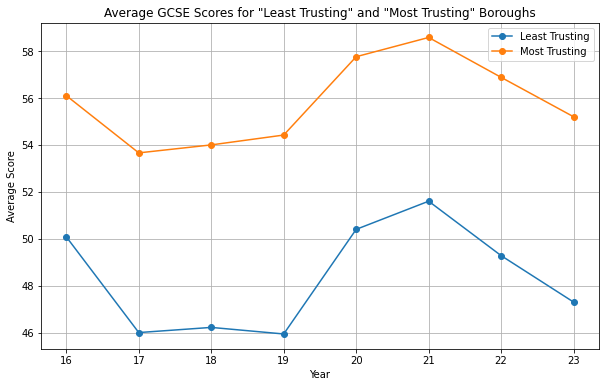

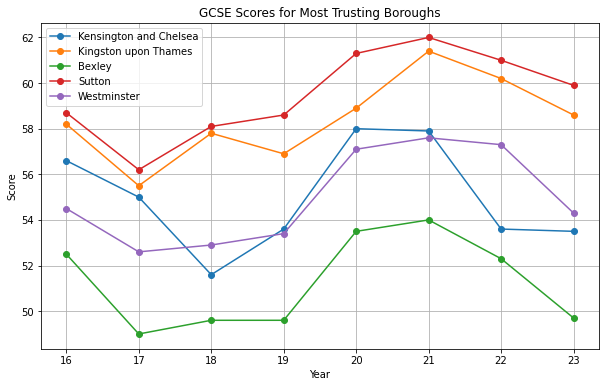

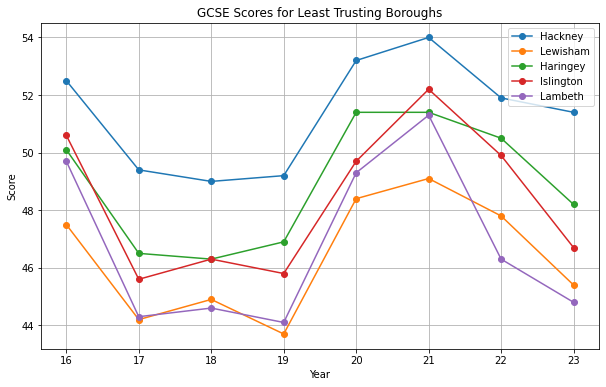

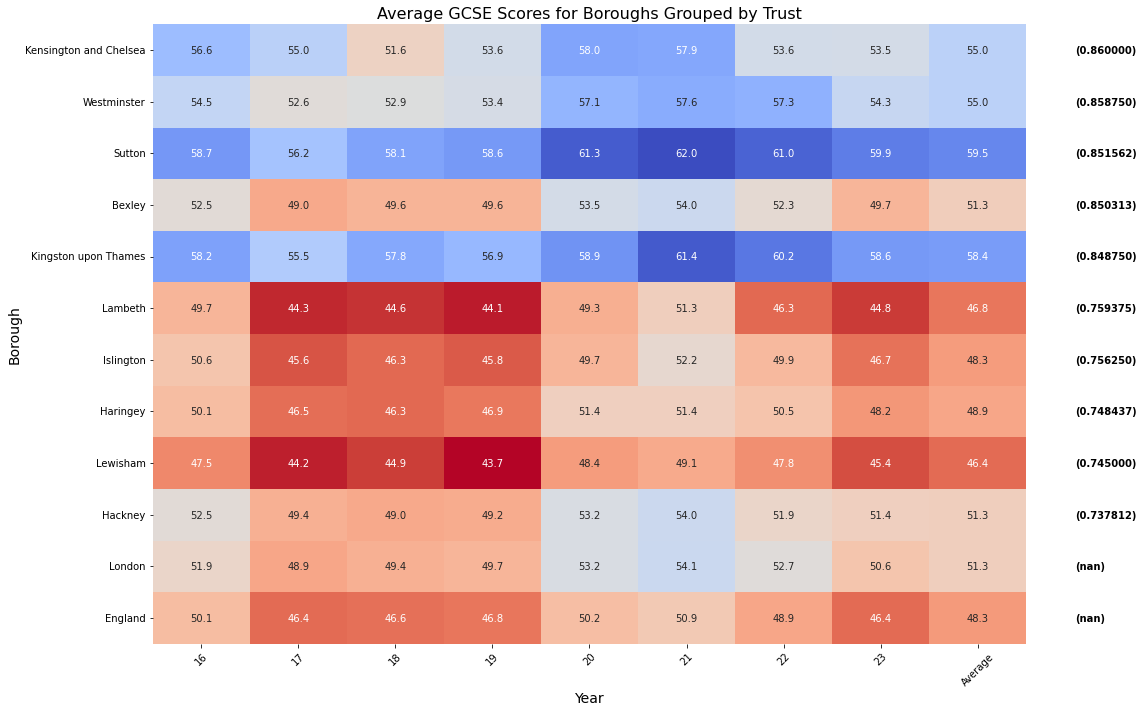

In [8]:
# Import pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Borough': ['Bexley', 'Hackney', 'Haringey', 'Islington', 'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Sutton', 'Westminster', 'London', 'England'],
    '23': [49.7, 51.4, 48.2, 46.7, 53.5, 58.6, 44.8, 45.4, 59.9, 54.3, 50.6, 46.4],
    '22': [52.3, 51.9, 50.5, 49.9, 53.6, 60.2, 46.3, 47.8, 61, 57.3, 52.7, 48.9],
    '21': [54.0, 54.0, 51.4, 52.2, 57.9, 61.4, 51.3, 49.1, 62.0, 57.6, 54.1, 50.9],
    '20': [53.5, 53.2, 51.4, 49.7, 58.0, 58.9, 49.3, 48.4, 61.3, 57.1, 53.2, 50.2],
    '19': [49.6, 49.2, 46.9, 45.8, 53.6, 56.9, 44.1, 43.7, 58.6, 53.4, 49.7, 46.8],
    '18': [49.6, 49.0, 46.3, 46.3, 51.6, 57.8, 44.6, 44.9, 58.1, 52.9, 49.4, 46.6],
    '17': [49.0, 49.4, 46.5, 45.6, 55.0, 55.5, 44.3, 44.2, 56.2, 52.6, 48.9, 46.4],
    '16': [52.5, 52.5, 50.1, 50.6, 56.6, 58.2, 49.7, 47.5, 58.7, 54.5, 51.9, 50.1]
}

df = pd.DataFrame(data)
df.set_index('Borough', inplace=True)

df = (df[df.columns[::-1]])
print(df)

# Select boroughs for the "least trusting" group
least_trusting_boroughs = ['Hackney', 'Lewisham', 'Haringey', 'Islington', 'Lambeth']
df_least_trusting = df.loc[least_trusting_boroughs]

# Select boroughs for the "most trusting" group
most_trusting_boroughs = ['Kensington and Chelsea', 'Kingston upon Thames', 'Bexley', 'Sutton', 'Westminster']
df_most_trusting = df.loc[most_trusting_boroughs]

# Calculate average scores for each group
avg_score_least_trusting = df_least_trusting.mean()
avg_score_most_trusting = df_most_trusting.mean()

# Create a DataFrame for the average scores
avg_scores = pd.DataFrame({'Least Trusting': avg_score_least_trusting, 'Most Trusting': avg_score_most_trusting})

# Plotting line plots
plt.figure(figsize=(10, 6))

# Plot for Least Trusting Group
plt.plot(avg_scores.index, avg_scores['Least Trusting'], label='Least Trusting', marker='o')

# Plot for Most Trusting Group
plt.plot(avg_scores.index, avg_scores['Most Trusting'], label='Most Trusting', marker='o')

plt.title('Average GCSE Scores for "Least Trusting" and "Most Trusting" Boroughs')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.legend()
plt.grid(True)
plt.show()

# Select boroughs for the "least trusting" group
least_trusting_boroughs = ['Hackney', 'Lewisham', 'Haringey', 'Islington', 'Lambeth']
df_least_trusting = df.loc[least_trusting_boroughs]

# Select boroughs for the "most trusting" group
most_trusting_boroughs = ['Kensington and Chelsea', 'Kingston upon Thames', 'Bexley', 'Sutton', 'Westminster']
df_most_trusting = df.loc[most_trusting_boroughs]

# Plotting line plots for "Most Trusting" group
plt.figure(figsize=(10, 6))
for borough in df_most_trusting.index:
    plt.plot(df_most_trusting.columns, df_most_trusting.loc[borough], label=borough, marker='o')
plt.title('GCSE Scores for Most Trusting Boroughs')
plt.xlabel('Year')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

# Plotting line plots for "Least Trusting" group
plt.figure(figsize=(10, 6))
for borough in df_least_trusting.index:
    plt.plot(df_least_trusting.columns, df_least_trusting.loc[borough], label=borough, marker='o')
plt.title('GCSE Scores for Least Trusting Boroughs')
plt.xlabel('Year')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

# Trust coefficients provided
trust_coefficients = {
    'Borough': ['Hackney', 'Lewisham', 'Haringey', 'Islington', 'Lambeth', 'Kingston upon Thames', 'Bexley', 'Sutton', 'Westminster', 'Kensington and Chelsea'],
    'Trust': [0.737812, 0.745000, 0.748437, 0.756250, 0.759375, 0.848750, 0.850313, 0.851562, 0.858750, 0.860000]
}

# Add trust coefficients to the DataFrame
trust_df = pd.DataFrame(trust_coefficients)
trust_df.set_index('Borough', inplace=True)
df['Trust'] = trust_df['Trust']

# Calculate the average scores for each borough
df['Average'] = df[['16', '17', '18', '19', '20', '21', '22', '23']].mean(axis=1)

# Sort boroughs by their trust coefficients
df_sorted = df.sort_values(by='Trust', ascending=False)

# Select the top 5 and bottom 5 boroughs
most_trusting_boroughs = df_sorted.head(5).index.tolist()
least_trusting_boroughs = df_sorted.tail(5).index.tolist()

# Create a new column to indicate group
df['Group'] = ['Most Trusting' if borough in most_trusting_boroughs else 'Least Trusting' for borough in df.index]

df = df[['16', '17', '18', '19', '20', '21', '22', '23', 'Average', 'Trust', 'Group']]

# Sort DataFrame by Group to group 'Most Trusting' and 'Least Trusting' together
df_sorted_by_group = df.sort_values(by=['Group', 'Trust'], ascending=[False, False])

# Plotting heatmap
plt.figure(figsize=(16, 10))  # Increase the figure size to avoid overlapping annotations
heatmap_data = df_sorted_by_group.drop(columns=['Group'])
ax = sns.heatmap(heatmap_data.drop(columns=['Trust']), cmap='coolwarm_r', annot=True, fmt=".1f", cbar=False)

# Add annotations for trust scores next to each borough name
for idx, (borough, row) in enumerate(heatmap_data.iterrows()):
    trust_score = row['Trust']
    ax.text(len(heatmap_data.columns) - 0.5, idx + 0.5, f'({trust_score:.6f})', color='black', va='center', ha='left', fontsize=10, weight='bold')

plt.title('Average GCSE Scores for Boroughs Grouped by Trust', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Borough', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [9]:
df

,16,17,18,19,20,21,22,23,Average,Trust,Group
Borough,,,,,,,,,,,
Bexley,52.5,49.0,49.6,49.6,53.5,54.0,52.3,49.7,51.2750,0.850313,Most Trusting
Hackney,52.5,49.4,49.0,49.2,53.2,54.0,51.9,51.4,51.3250,0.737812,Least Trusting
Haringey,50.1,46.5,46.3,46.9,51.4,51.4,50.5,48.2,48.9125,0.748437,Least Trusting
Islington,50.6,45.6,46.3,45.8,49.7,52.2,49.9,46.7,48.3500,0.756250,Least Trusting
Kensington and Chelsea,56.6,55.0,51.6,53.6,58.0,57.9,53.6,53.5,54.9750,0.860000,Most Trusting
Kingston upon Thames,58.2,55.5,57.8,56.9,58.9,61.4,60.2,58.6,58.4375,0.848750,Most Trusting
Lambeth,49.7,44.3,44.6,44.1,49.3,51.3,46.3,44.8,46.8000,0.759375,Least Trusting
Lewisham,47.5,44.2,44.9,43.7,48.4,49.1,47.8,45.4,46.3750,0.745000,Least Trusting
Sutton,58.7,56.2,58.1,58.6,61.3,62.0,61.0,59.9,59.4750,0.851562,Most Trusting


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, ttest_ind

# Data Preparation
data = {
    'Borough': ['Bexley', 'Hackney', 'Haringey', 'Islington', 'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Sutton', 'Westminster', 'London', 'England'],
    '23': [49.7, 51.4, 48.2, 46.7, 53.5, 58.6, 44.8, 45.4, 59.9, 54.3, 50.6, 46.4],
    '22': [52.3, 51.9, 50.5, 49.9, 53.6, 60.2, 46.3, 47.8, 61, 57.3, 52.7, 48.9],
    '21': [54.0, 54.0, 51.4, 52.2, 57.9, 61.4, 51.3, 49.1, 62.0, 57.6, 54.1, 50.9],
    '20': [53.5, 53.2, 51.4, 49.7, 58.0, 58.9, 49.3, 48.4, 61.3, 57.1, 53.2, 50.2],
    '19': [49.6, 49.2, 46.9, 45.8, 53.6, 56.9, 44.1, 43.7, 58.6, 53.4, 49.7, 46.8],
    '18': [49.6, 49.0, 46.3, 46.3, 51.6, 57.8, 44.6, 44.9, 58.1, 52.9, 49.4, 46.6],
    '17': [49.0, 49.4, 46.5, 45.6, 55.0, 55.5, 44.3, 44.2, 56.2, 52.6, 48.9, 46.4],
    '16': [52.5, 52.5, 50.1, 50.6, 56.6, 58.2, 49.7, 47.5, 58.7, 54.5, 51.9, 50.1]
}

df = pd.DataFrame(data)
df.set_index('Borough', inplace=True)
df = df[df.columns[::-1]]

# Trust coefficients
trust_coefficients = {
    'Borough': ['Hackney', 'Lewisham', 'Haringey', 'Islington', 'Lambeth', 'Kingston upon Thames', 'Bexley', 'Sutton', 'Westminster', 'Kensington and Chelsea'],
    'Trust': [0.737812, 0.745000, 0.748437, 0.756250, 0.759375, 0.848750, 0.850313, 0.851562, 0.858750, 0.860000]
}

trust_df = pd.DataFrame(trust_coefficients)
trust_df.set_index('Borough', inplace=True)
df['Trust'] = trust_df['Trust']

# Calculate the average scores for each borough
df['Average'] = df[['16', '17', '18', '19', '20', '21', '22', '23']].mean(axis=1)

# Filter out rows where Trust is NaN
df = df.dropna(subset=['Trust'])

# Correlation Analysis
correlation, p_value_corr = pearsonr(df['Trust'], df['Average'])
print(f"Pearson correlation coefficient: {correlation:.2f}, p-value: {p_value_corr:.4f}")

# Sort boroughs by their trust coefficients
df_sorted = df.sort_values(by='Trust', ascending=False)

# Select the top 5 and bottom 5 boroughs
most_trusting_boroughs = df_sorted.head(5).index.tolist()
least_trusting_boroughs = df_sorted.tail(5).index.tolist()

# Create a new column to indicate group
df['Group'] = ['Most Trusting' if borough in most_trusting_boroughs else 'Least Trusting' for borough in df.index]

df = df[['16', '17', '18', '19', '20', '21', '22', '23', 'Average', 'Trust', 'Group']]

# Statistical Test: T-Test
most_trusting_scores = df[df['Group'] == 'Most Trusting']['Average']
least_trusting_scores = df[df['Group'] == 'Least Trusting']['Average']

t_stat, p_value_ttest = ttest_ind(most_trusting_scores, least_trusting_scores, equal_var=False)
print(f"T-test statistic: {t_stat:.2f}, p-value: {p_value_ttest:.4f}")


Pearson correlation coefficient: 0.81, p-value: 0.0045
T-test statistic: 4.40, p-value: 0.0037


In [14]:
import pandas as pd

# Sample DataFrame creation (replace this with your actual data loading step)
data = {
    'Date': ['2023-01-01', '2023-01-02', '2023-01-01', '2023-01-02'],
    'Borough': ['Westminster', 'Westminster', 'Camden', 'Camden'],
    'Proportion': [0.1, 0.2, 0.3, 0.4]
}
df = pd.DataFrame(data)

# Convert Date column to datetime (if necessary)
df['Date'] = pd.to_datetime(df['Date'])

# Group by Borough and calculate the mean proportion for each
average_proportions = df.groupby('Borough')['Proportion'].mean().reset_index()

# Rename columns for clarity
average_proportions.columns = ['Borough', 'Average Proportion']

# Display the result
print(average_proportions)


       Borough  Average Proportion
0       Camden                0.35
1  Westminster                0.15


In [15]:
df_pas = pd.read_csv(r"C:\Users\lowik\OneDrive - TU Eindhoven\Uni mapsh\2023-2024\Data Challenge 2\JBG050-Group14\Education\PAS_buroughs.csv", delimiter=';')
df_pas_trust = df_pas[df_pas['Measure'] == 'Trust MPS']
df_pas_trust

,Date,Survey,Borough,Measure,Proportion,MPS
6720,31/03/2016,PAS,Barking and Dagenham,Trust MPS,"0,83","0,86"
6721,31/03/2016,PAS,Barnet,Trust MPS,"0,87","0,86"
6722,31/03/2016,PAS,Bexley,Trust MPS,"0,9","0,86"
6723,31/03/2016,PAS,Brent,Trust MPS,"0,83","0,86"
6724,31/03/2016,PAS,Bromley,Trust MPS,"0,88","0,86"
...,...,...,...,...,...,...
9275,31/12/2023,PAS,Sutton,Trust MPS,"0,76","0,69"
9276,31/12/2023,PAS,Tower Hamlets,Trust MPS,"0,72","0,69"
9277,31/12/2023,PAS,Waltham Forest,Trust MPS,"0,57","0,69"
9278,31/12/2023,PAS,Wandsworth,Trust MPS,"0,69","0,69"


In [16]:
df_pas_trust['Proportion'] = df_pas_trust['Proportion'].str.replace(',', '.').astype(float)

C:\Users\lowik\AppData\Local\Temp\ipykernel_12848\3411666973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pas_trust['Proportion'] = df_pas_trust['Proportion'].str.replace(',', '.').astype(float)


In [17]:
df_pas_trust['Proportion']

6720    0.83
6721    0.87
6722    0.90
6723    0.83
6724    0.88
        ... 
9275    0.76
9276    0.72
9277    0.57
9278    0.69
9279    0.78
Name: Proportion, Length: 1024, dtype: float64

In [18]:
# Extract year from the Date column
df_pas_trust['Date'] = pd.to_datetime(df_pas_trust['Date'], format='%d/%m/%Y')

# Extract year from the Date column
df_pas_trust['Year'] = df_pas_trust['Date'].dt.year

# Group by Borough and Year and calculate the mean proportion for each
average_proportions = df_pas_trust.groupby(['Borough', 'Year'])['Proportion'].mean().reset_index()

# Rename columns for clarity
average_proportions.columns = ['Borough', 'Year', 'Average Proportion']

# Display the result
average_proportions

C:\Users\lowik\AppData\Local\Temp\ipykernel_12848\1887591936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pas_trust['Date'] = pd.to_datetime(df_pas_trust['Date'], format='%d/%m/%Y')
C:\Users\lowik\AppData\Local\Temp\ipykernel_12848\1887591936.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pas_trust['Year'] = df_pas_trust['Date'].dt.year


,Borough,Year,Average Proportion
0,Barking and Dagenham,2016,0.8550
1,Barking and Dagenham,2017,0.8975
2,Barking and Dagenham,2018,0.8375
3,Barking and Dagenham,2019,0.8325
4,Barking and Dagenham,2020,0.8500
...,...,...,...
252,Wandsworth,2019,0.8375
253,Wandsworth,2020,0.8025
254,Wandsworth,2021,0.7675
255,Wandsworth,2022,0.7200


In [19]:
df_gcse = pd.read_csv(r"C:\Users\lowik\OneDrive - TU Eindhoven\Uni mapsh\2023-2024\Data Challenge 2\JBG050-Group14\Education\gcse_csv_results.csv", delimiter=';')
df_gcse_borough = df_gcse['Borough']
df_gcse_year = df_gcse['Year']
df_gcse_score = df_gcse['Score']

C:\Users\lowik\AppData\Local\Temp\ipykernel_12848\2205897565.py:1: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_gcse = pd.read_csv(r"C:\Users\lowik\OneDrive - TU Eindhoven\Uni mapsh\2023-2024\Data Challenge 2\JBG050-Group14\Education\gcse_csv_results.csv", delimiter=';')


In [20]:
df_gcse_correct = [df_gcse_borough, df_gcse_year, df_gcse_score]

In [21]:
gcse = pd.concat(df_gcse_correct, axis=1)

In [22]:
gcse['Score'] = gcse['Score'].str.replace(',', '.').astype(float)

In [25]:
gcse = gcse.drop(gcse.index[-1])

In [26]:
gcse['Year'] = gcse['Year'].astype(int)
gcse['Year']

0      2016
1      2016
2      2016
3      2016
4      2016
       ... 
347    2023
348    2023
349    2023
350    2023
351    2023
Name: Year, Length: 352, dtype: int32

In [27]:
gcse


,Borough,Year,Score
0,Barking and Dagenham,2016,49.7
1,Barnet,2016,56.1
2,Bexley,2016,52.2
3,Brent,2016,51.5
4,Bromley,2016,53.7
...,...,...,...
347,Waltham Forest,2023,45.7
348,Wandsworth,2023,50.4
349,West Midlands,2023,44.9
350,Westminster,2023,54.3


In [28]:
average_proportions['Year']

0      2016
1      2017
2      2018
3      2019
4      2020
       ... 
252    2019
253    2020
254    2021
255    2022
256    2023
Name: Year, Length: 257, dtype: int64

Linear Regression Performance:
R-squared: 0.04
Mean Absolute Error: 3.11
Mean Squared Error: 15.30
Root Mean Squared Error: 3.91

Polynomial Regression Performance:
R-squared: 0.07
Mean Absolute Error: 3.05
Mean Squared Error: 14.86
Root Mean Squared Error: 3.86

Decision Tree Regression Performance:
R-squared: -0.59
Mean Absolute Error: 3.81
Mean Squared Error: 25.49
Root Mean Squared Error: 5.05

Random Forest Regression Performance:
R-squared: -0.34
Mean Absolute Error: 3.48
Mean Squared Error: 21.39
Root Mean Squared Error: 4.62



<Figure size 1008x576 with 0 Axes>

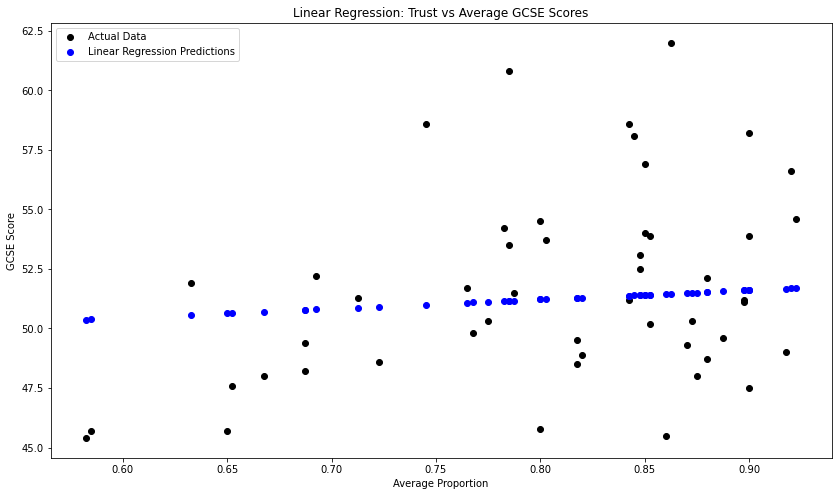

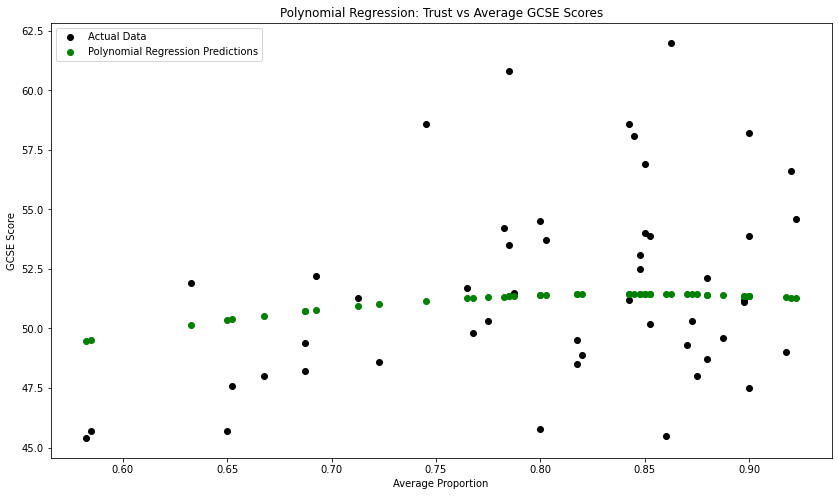

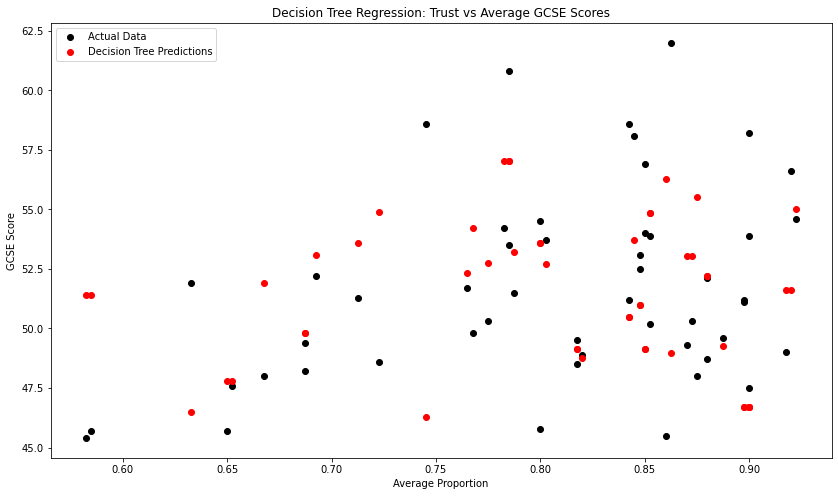

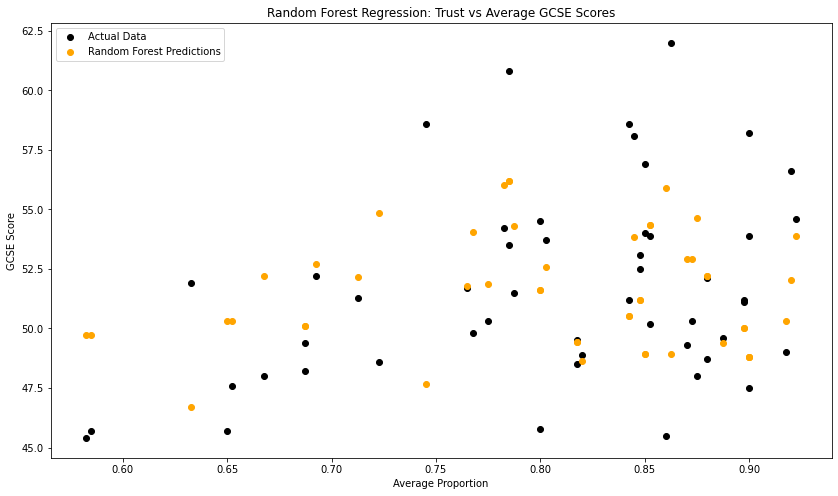

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

common_boroughs = set(gcse['Borough']).intersection(set(average_proportions['Borough']))
gcse_filtered = gcse[gcse['Borough'].isin(common_boroughs)]

merged_df = pd.merge(gcse_filtered, average_proportions, on=['Borough', 'Year'])
# df_clean = merged_df.dropna(subset=['Score', 'Average Proportion'])
X = merged_df[['Average Proportion']]
y = merged_df['Score']  # You can also predict trust scores instead by replacing 'Score' with 'Average Proportion'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Function to print evaluation metrics
def print_metrics(model_name, y_true, y_pred):
    print(f"{model_name} Performance:")
    print(f"R-squared: {r2_score(y_true, y_pred):.2f}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"Mean Squared Error: {mean_squared_error(y_true, y_pred):.2f}")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print("")

### Simple Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
print_metrics("Linear Regression", y_test, y_pred_lin)

### Polynomial Regression 
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
y_pred_poly = poly_reg.predict(X_poly_test)
print_metrics("Polynomial Regression", y_test, y_pred_poly)

### Decision Tree Regression
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)
print_metrics("Decision Tree Regression", y_test, y_pred_tree)

### Random Forest Regression
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)
y_pred_forest = forest_reg.predict(X_test)
print_metrics("Random Forest Regression", y_test, y_pred_forest)


plt.figure(figsize=(14, 8))


# Linear Regression Plot
plt.figure(figsize=(14, 8))
plt.scatter(X_test, y_test, color='black', label='Actual Data')
plt.scatter(X_test, y_pred_lin, color='blue', label='Linear Regression Predictions')
plt.title('Linear Regression: Trust vs Average GCSE Scores')
plt.xlabel('Average Proportion')
plt.ylabel('GCSE Score')
plt.legend()
plt.savefig('Linear_Regression_Trust_vs_GCSE_scores.png', dpi=300)
plt.show()

# Polynomial Regression Plot
plt.figure(figsize=(14, 8))
plt.scatter(X_test, y_test, color='black', label='Actual Data')
plt.scatter(X_test, y_pred_poly, color='green', label='Polynomial Regression Predictions')
plt.title('Polynomial Regression: Trust vs Average GCSE Scores')
plt.xlabel('Average Proportion')
plt.ylabel('GCSE Score')
plt.legend()
plt.savefig('Polynomial_Regression_Trust_vs_GCSE_scores.png', dpi=300)
plt.show()

# Decision Tree Regression Plot
plt.figure(figsize=(14, 8))
plt.scatter(X_test, y_test, color='black', label='Actual Data')
plt.scatter(X_test, y_pred_tree, color='red', label='Decision Tree Predictions')
plt.title('Decision Tree Regression: Trust vs Average GCSE Scores')
plt.xlabel('Average Proportion')
plt.ylabel('GCSE Score')
plt.legend()
plt.savefig('Decision_Tree_Regression_Trust_vs_GCSE_scores.png', dpi=300)
plt.show()

# Random Forest Regression Plot
plt.figure(figsize=(14, 8))
plt.scatter(X_test, y_test, color='black', label='Actual Data')
plt.scatter(X_test, y_pred_forest, color='orange', label='Random Forest Predictions')
plt.title('Random Forest Regression: Trust vs Average GCSE Scores')
plt.xlabel('Average Proportion')
plt.ylabel('GCSE Score')
plt.legend()
plt.savefig('Random_Forest_Regression_Trust_vs_GCSE_scores.png', dpi=300)
plt.show()


Linear Regression Performance:
R-squared: 0.04
Mean Absolute Error: 3.11
Mean Squared Error: 15.30
Root Mean Squared Error: 3.91

Polynomial Regression Performance:
R-squared: 0.07
Mean Absolute Error: 3.05
Mean Squared Error: 14.86
Root Mean Squared Error: 3.86

Decision Tree Regression Performance:
R-squared: -0.59
Mean Absolute Error: 3.81
Mean Squared Error: 25.49
Root Mean Squared Error: 5.05

Random Forest Regression Performance:
R-squared: -0.34
Mean Absolute Error: 3.48
Mean Squared Error: 21.39
Root Mean Squared Error: 4.62



C:\Users\lowik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


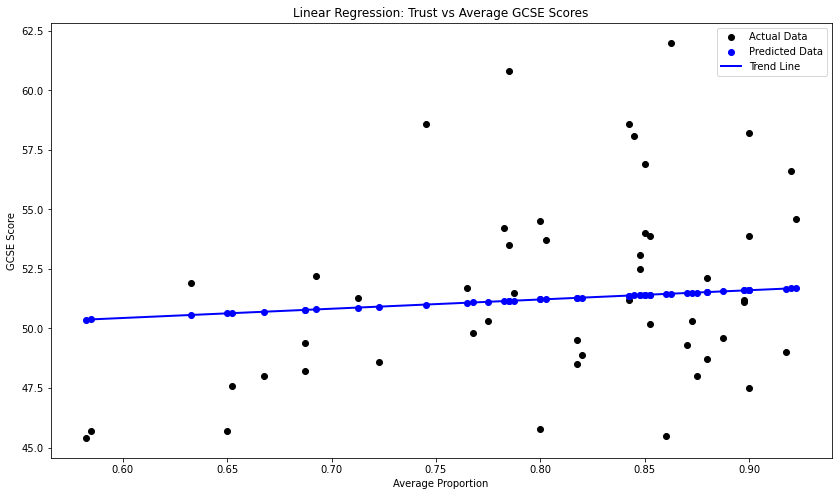

C:\Users\lowik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


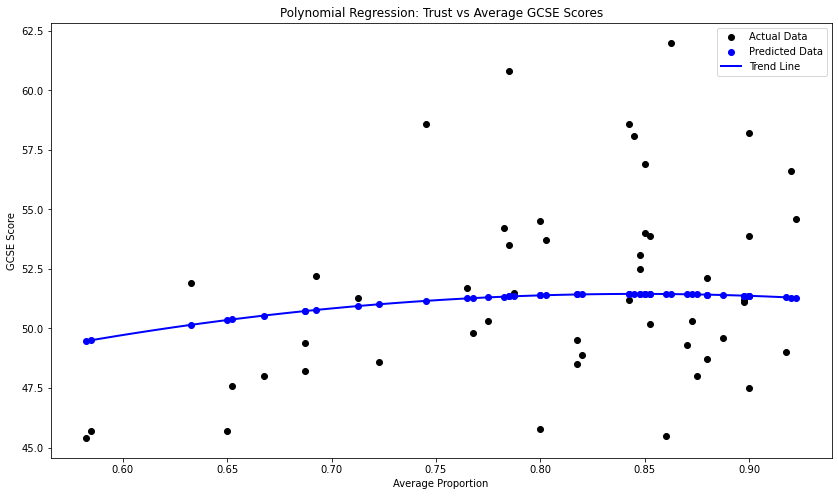

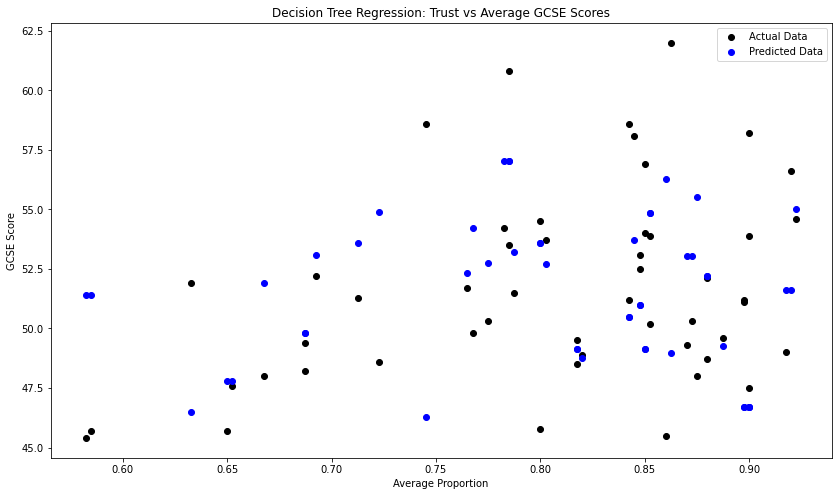

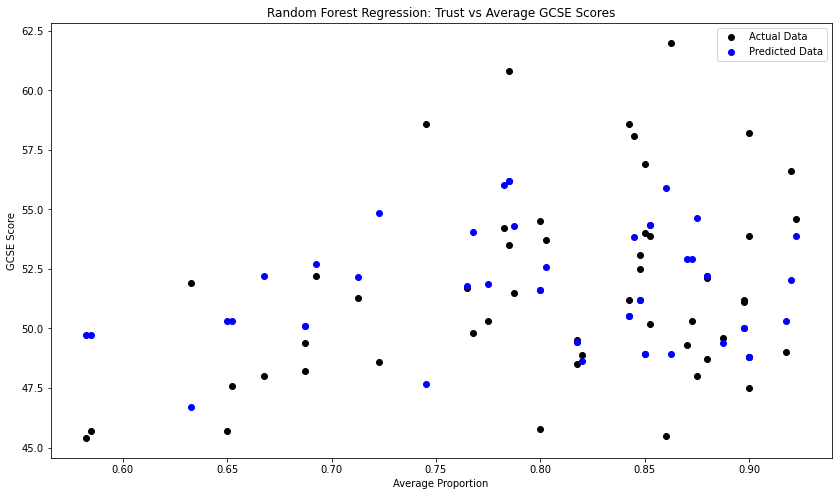

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming gcse and average_proportions are your DataFrames for GCSE scores and trust scores respectively

# Step 1: Data Preparation
common_boroughs = set(gcse['Borough']).intersection(set(average_proportions['Borough']))
gcse_filtered = gcse[gcse['Borough'].isin(common_boroughs)]

# Step 2: Merge Datasets
merged_df = pd.merge(gcse_filtered, average_proportions, on=['Borough', 'Year'])
# df_clean = merged_df.dropna(subset=['Score', 'Average Proportion'])
X = merged_df[['Average Proportion']]
y = merged_df['Score']  # You can also predict trust scores instead by replacing 'Score' with 'Average Proportion'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to print evaluation metrics
def print_metrics(model_name, y_true, y_pred):
    print(f"{model_name} Performance:")
    print(f"R-squared: {r2_score(y_true, y_pred):.2f}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"Mean Squared Error: {mean_squared_error(y_true, y_pred):.2f}")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print("")

# Simple Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
print_metrics("Linear Regression", y_test, y_pred_lin)

# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
y_pred_poly = poly_reg.predict(X_poly_test)
print_metrics("Polynomial Regression", y_test, y_pred_poly)

# Decision Tree Regression
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)
print_metrics("Decision Tree Regression", y_test, y_pred_tree)

# Random Forest Regression
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)
y_pred_forest = forest_reg.predict(X_test)
print_metrics("Random Forest Regression", y_test, y_pred_forest)

# Function to plot residuals
def plot_with_trend_line(X_test, y_test, y_pred, title, file_name, model=None):
    plt.figure(figsize=(14, 8))
    plt.scatter(X_test, y_test, color='black', label='Actual Data')
    plt.scatter(X_test, y_pred, color='blue', label='Predicted Data')
    
    if model:
        # Generate points for trend line
        X_range = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
        if model == "polynomial":
            X_range_poly = poly_features.transform(X_range)
            y_range_pred = poly_reg.predict(X_range_poly)
        else:
            y_range_pred = lin_reg.predict(X_range)
        plt.plot(X_range, y_range_pred, color='blue', linewidth=2, label='Trend Line')

    plt.title(title)
    plt.xlabel('Average Proportion')
    plt.ylabel('GCSE Score')
    plt.legend()
    plt.savefig(file_name, dpi=300)
    plt.show()

# Plotting the Results

# Linear Regression Plot with Trend Line
plot_with_trend_line(X_test, y_test, y_pred_lin, 'Linear Regression: Trust vs Average GCSE Scores', 'Linear_Regression_Trust_vs_GCSE_scores.png', model="linear")

# Polynomial Regression Plot with Trend Line
plot_with_trend_line(X_test, y_test, y_pred_poly, 'Polynomial Regression: Trust vs Average GCSE Scores', 'Polynomial_Regression_Trust_vs_GCSE_scores.png', model="polynomial")

# Decision Tree Regression Plot
plot_with_trend_line(X_test, y_test, y_pred_tree, 'Decision Tree Regression: Trust vs Average GCSE Scores', 'Decision_Tree_Regression_Trust_vs_GCSE_scores.png')

# Random Forest Regression Plot
plot_with_trend_line(X_test, y_test, y_pred_forest, 'Random Forest Regression: Trust vs Average GCSE Scores', 'Random_Forest_Regression_Trust_vs_GCSE_scores.png')


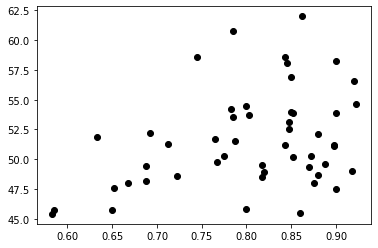

In [30]:
plt.scatter(X_test, y_test, color='black', label='Actual Data')


In [31]:
correlation, p_value_corr = pearsonr(merged_df['Average Proportion'], merged_df['Score'])
print(f"Pearson correlation coefficient: {correlation:.2f}, p-value: {p_value_corr:.4f}")

Pearson correlation coefficient: 0.14, p-value: 0.0267


In [ ]:
# plt.scatter(X, y, color='black', label='Actual Data')

Linear Regression Performance:
R-squared: 0.03
Mean Absolute Error: 2.50
Mean Squared Error: 10.85
Root Mean Squared Error: 3.29

Polynomial Regression Performance:
R-squared: 0.07
Mean Absolute Error: 2.47
Mean Squared Error: 10.39
Root Mean Squared Error: 3.22

Decision Tree Regression Performance:
R-squared: -0.68
Mean Absolute Error: 3.48
Mean Squared Error: 18.74
Root Mean Squared Error: 4.33

Random Forest Regression Performance:
R-squared: -0.48
Mean Absolute Error: 3.27
Mean Squared Error: 16.52
Root Mean Squared Error: 4.06



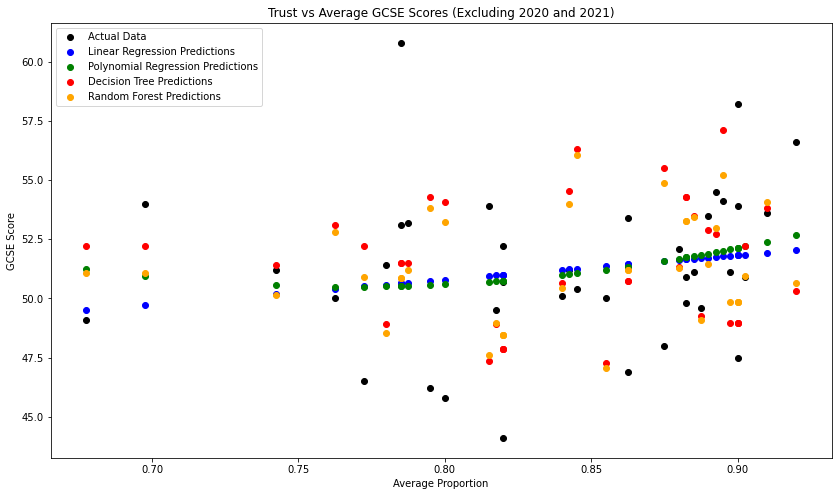

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Data Preparation
common_boroughs = set(gcse['Borough']).intersection(set(average_proportions['Borough']))
gcse_filtered = gcse[gcse['Borough'].isin(common_boroughs)]

# Filter out years 2020 and 2021
gcse_filtered = gcse_filtered[~gcse_filtered['Year'].isin([2022, 2023])]

# Step 2: Merge Datasets
merged_df = pd.merge(gcse_filtered, average_proportions, on=['Borough', 'Year'])

# Step 3: Modeling
X = merged_df[['Average Proportion']]
y = merged_df['Score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to print evaluation metrics
def print_metrics(model_name, y_true, y_pred):
    print(f"{model_name} Performance:")
    print(f"R-squared: {r2_score(y_true, y_pred):.2f}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"Mean Squared Error: {mean_squared_error(y_true, y_pred):.2f}")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print("")

# Simple Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
print_metrics("Linear Regression", y_test, y_pred_lin)

# Polynomial Regression (degree 2)
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
y_pred_poly = poly_reg.predict(X_poly_test)
print_metrics("Polynomial Regression", y_test, y_pred_poly)

# Decision Tree Regression
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)
print_metrics("Decision Tree Regression", y_test, y_pred_tree)

# Random Forest Regression
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)
y_pred_forest = forest_reg.predict(X_test)
print_metrics("Random Forest Regression", y_test, y_pred_forest)

# Plotting the Results
plt.figure(figsize=(14, 8))

# Actual vs Predicted
plt.scatter(X_test, y_test, color='black', label='Actual Data')
plt.scatter(X_test, y_pred_lin, color='blue', label='Linear Regression Predictions')
plt.scatter(X_test, y_pred_poly, color='green', label='Polynomial Regression Predictions')
plt.scatter(X_test, y_pred_tree, color='red', label='Decision Tree Predictions')
plt.scatter(X_test, y_pred_forest, color='orange', label='Random Forest Predictions')

plt.title('Trust vs Average GCSE Scores (Excluding 2020 and 2021)')
plt.xlabel('Average Proportion')
plt.ylabel('GCSE Score')
plt.legend()
plt.show()
